<a href="https://colab.research.google.com/github/DDoeuiGongju/DoItDeeplearning/blob/main/04_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 퍼셉트론


> **이진분류**에서 최적의 가중치를 학습하는 알고리즘. 선형회귀와 유사한 구조를 가지고 있다(직선의 방정식 사용). 그러나 마지막 단계에 샘플을 이진분류하기 위한 **계단함수**(step function)사용하고, 함수를 통과한 값을 다시 가중치와 절편을 업데이트(학습)하는데 사용한다.  
※ 퍼셉트론은 사이킷런 패키지에서 Perceptron이라는 이름으로 제공
- w1x1 + w2x2 + ... + wnxn + b = z → <계단 함수> → (역방향 계산)y_hat
- 뉴런은 입력신호를 받아 선형함수를 통과시켜 z를 만든다.
  - 선형함수: w1x1 + w2x2 + ... + wnxn + b = z
- z를 계단함수로 보내 0보다 크거나 같으면 1(positive class)로, 0보다 작으면 -1(negative class)로 분류한다.  


### 아달린


> 퍼셉트론을 개선한 적응형 뉴런. **선형함수의 결과를 학습에** 사용하고 계단함수의 결과는 예측에만 활용한다.
- w1x1 + w2x2 + ... + wnxn + b = z(역방향 계산) → <계단 함수> → y_hat

### 로지스틱 회귀


> 아달린에서 발전한 형태로 선형함수를 통과시켜 얻은 z를 임계함수에 보내기 전 변형시킨다. 변형시키는 함수를 활성화 함수라고 한다.
- w1x1 + w2x2 + ... + wnxn + b = z → <활성화 함수> → a(역방향 계산) → <임계 함수> → y_hat
- **임계함수**(threshold function): 퍼셉트론이나 아달린의 계단함수와 역할은 비슷하나 활성화 함수의 출력값을 사용한다는 점이 다르다.
- **활성화 함수**(activation function): 비선형 함수를 사용한다. 로지스틱 회귀에서는 **시그모이드 함수**를 사용한다.
   - **시그모이드 함수**: z를 0~1사이의 확률값으로 변환. 보통 a가 0.5보다 크면 positive class, 이하면 negative class로 구분.
    - odds ratio > logit function > sigmoid function
    - 무한대의 범위를 가지는 z의 값을 확률처럼 해석할 수 있도록 함     


올바르게 분류된 샘플의 비율은 미분 가능한 함수가 아니므로 경사 하강법의 손실함수를 사용할 수 없다. 그러므로 **로지스틱 손실 함수**를 사용해야 한다.
- **로지스틱 손실 함수**: 다중분류를 위한 손실함수인 크로스 엔트로피(cross entropy) 손실함수를 이진분류 버전으로 만든 것이다. 로지스틱 손실 함수의 미분을 통해 로지스틱 손실함수의 값을 최소로 하는 가중치와 절편을 찾아야 한다.
  - L = -(ylog(a) + (1-y)log(1-a))
  - 가중치에 대해 미분할 때 연쇄법칙을 사용할 수 있다.
  - 로지스틱 손실 함수의 미분 결과는 제곱 오차 손실 함수의 미분 결과와 동일하다.












## **유방암 데이터 샘플이 악성종양(True)인지 양성종양(False)인지 이진 분류하는 모델**

cancer의 입력 데이터 크기: (569, 30), 타겟 데이터 크기: (569,)


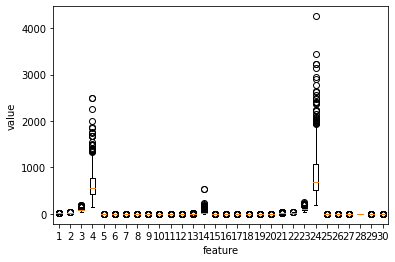

4번, 14번, 24번: ['mean area' 'area error' 'worst area']
타깃의 고유한 값과 등장 횟수:  (array([0, 1]), array([212, 357]))


In [ ]:
# 유방암 데이터세트 준비
# 1. load_breast_cancer()함수 호출하기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 2. 입력 데이터 확인하기
# cancer에는 569개의 샘플과 30개의 특성이 있다.
print("cancer의 입력 데이터 크기: {}, 타겟 데이터 크기: {}".format(cancer.data.shape, cancer.target.shape))  

# 3. box plot으로 특성의 사분위 관찰하기
# 특성이 많아 산점도로 표현하기 어려우니 박스플롯(box plot)을 이용해 각 특성의 사분위(quartile)값을 나타낸다.
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 4. 눈에 뛰는 특성 살펴보기
# 4번, 14번, 24번 특성이 다른 특성보다 눈에 뛴다.
print('4번, 14번, 24번:', cancer.feature_names[[3, 13, 23]])   # ['mean area', 'area error', 'worst area'] -> 영역(넓이)에 대한 특성

# 5. 타깃 데이터 확인하기
import numpy as np
# unique(): 고유한 값을 찾아 반환. return_counts: 고유한 값이 등장하는 횟수
print('타깃의 고유한 값과 등장 횟수: ', np.unique(cancer.target, return_counts=True))   # 212개의 음성 종양과 357개의 양성 종양

# 6. 훈련 데이터 세트(train set) 저장하기
x = cancer.data
y = cancer.target

### 모델의 성능 평가


> 훈련된 모델의 실전 성능을 일반화 성능(generalization performance)라고 한다.
모델을 학습시킨 훈련데이터 셋으로 다시 모델의 성능을 평가하면 과도하게 낙관적인 일반화 성능을 추정한다. 그러므로 훈련 데이터 셋은 두 덩어리로 나눠 하나는 훈련에, 다른 하나는 테스트에 사용한다(training set/test set).
- 훈련 셋이 테스트 셋 보다 많아야 한다.
- positive class, negative class가 한쪽에 몰리지 않아야 한다(각 class의 비율이 일정해야 함).


In [ ]:
# 훈련 셋과 테스트 셋으로 나누기
from sklearn.model_selection import train_test_split
# train_test_split(입력 데이터, 타깃 데이터, stratify: 각 set의 class의 비율을 동일하게 만듦, test_size: 테스트 셋의 비율(지정안하면 75:25), random_state: 실험 결과를 매번 똑같게 하기 위해 난수 초깃값 42 지정(실전에서는 필요X))
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

print('x_train set크기: {}, x_test set크기: {}'.format(x_train.shape, x_test.shape))
print('타깃의 고유한 값과 등장 횟수:',np.unique(y_train, return_counts=True))

x_train set크기: (455, 30), x_test set크기: (114, 30)
타깃의 고유한 값과 등장 횟수: (array([0, 1]), array([170, 285]))


In [ ]:
# 로지스틱 회귀 구현
class LogisticNeuron:
  def __init__(self):   # 가중치, 절편 초기화X. 추후 입력데이터를 보고 특성 개수에 맞게 결정
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선의 방정식: 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum()사용
    return z

  def activation(self, z):     # 시그모이드 계산
    a = 1 / (1 + np.exp(-z))   # np.exp() 자연 상수의 지수 함수 계산
    return a

  def backprop(self, x, err):
    w_grad = x * err   # 가중치에 대한 gradient계산 -> 손실함수를 가중치에 대해 미분한 식
    b_grad = 1 * err   # 절편에 대한 gradient계산   -> 절편을 가중치에 대해 미분한 식
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])                   # 가중치 1로 초기화
    self.b = 0                                     # 절편 0으로 초기화
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)                           # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)   # 역방향 계산
        self.w -= w_grad                           # 가중치 업데이트
        self.b -= b_grad                           # 절편 업데이트

  def predict(self, x):                    # 여러개 샘플에 대한 예측값을 한번에 계산하고 분류해주는 메서드
    z = [self.forpass(x_i) for x_i in x]   # 정방향 계산 -> 내포 문법 사용: 대괄호 안에 for문을 삽입해 새 리스트를 만드는 간결한 문법
    a = self.activation(np.array(z))       # 활성화 함수 적용 -> 리스트 z를 배열로 변환 후 적용
    return a > 0.5                         # 계단함수 적용

In [ ]:
# 모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


In [ ]:
# 테스트 셋을 이용해 정확도 평가하기
# predict()의 반환값은 True나 False로 채워지 샘플 크기의 배열이고 y_test는 0 또는 1로 채워진 샘플크기의 배열.
# np.mean은 매개변수로 전달된 배열의 평균을 계산.
# 즉, 계산 결과는 올바르게 예측한 샘플의 비율.
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


0.8245614035087719

일반적으로 신경망은 입력층, 은닉층, 출력층으로 표현되며 활성화함수는 은닉층과 출력층의 한부분으로 간주.
### 단일층 신경망


> 로지스틱 회귀는 은닉층이 없는 신경망이다. 이런 입력층과 출력층만 가지는 신경망을 단일층 신경망이라고 부른다.  
LogisticNeuron은 이미 단일층 신경망의 역할을 하고 있다. 여기에 몇 가지 유용한 기능을 추가할 것이다.
- 경사하강법은 손실함수의 결과값이 최소가 되는 방향으로 가중치를 업데이트 하는데 그 값이 작아지지 않는다면 잘못된 것이므로 값을 관찰
  - __ init __()에 self.losses를 만든다.
  - 매 에폭에서 샘플마다 손실함수를 계산하고 그 결과값을 모두 더한 다음 샘플 개수로 나눈 평균값을 self.losses변수에 저장한다.
  - 이때, a가 0에 가까워지면 np.log()의 값은 음의 무한대가 되고, 1에 가까워지면 0이 된다. 그러면 정확한 계산을 할 수 없으므로 a의 값이 -1x10^-10~1-1x10^10이 되도록 np.clip()으로 조정한다.
- 경사 하강법에는 지금까지 사용한 샘플데이터 1개에 대한 gradient를 계산한 **확률적 경사 하강법**(stochastic gradient descent) 뿐만 아니라 전체 훈련 세트를 사용해 한 번에 gradient를 계산하는 **배치 경사 하강법**(batch gradient desent)과 배치 크기를 작게 하여(훈련셋을 여러 번 나눠) 처리하는 방식인 **미니 배치 경사 하강법**이 있다.
  - 확률적 경사 하강법: 계산 비용은 적으나 최적화 수렴 과정 불안정
  - 배치 경사 하강법: 가중치가 최적화에 수렴하는 과정은 안정적이나 계산 비용 많음
  - 미니 배치 경사 하강법: 이 둘의 장점 절충
- 모든 경사 하강법들은 매 에폭마다 훈련 셋의 샘플 순서를 섞어 가중치 최적값을 계산해야 함  
  → 탐색 과정이 다양해짐
  - 배열의 인덱스를 섞은 후 인뎃스 순서대로 훈련셋 나열 → np.random.permutation()사용
- 정확도를 계산해주는 score() 추가 및 predict() 수정
  - 시그모이드 함수의 출력값은 0~1이고 positive class를 판단하는 기준은 0.5이상이다. 그런데 z가 0보가 크면 시그모이드 함수의 출력값은 0.5보다 크고, 작으면 0.5보다 작다. 그러므로 굳이 시그모이드 함수가 필요 없다.

In [ ]:
# 단일 신경망 구현
class SingleLayer:
  def __init__(self):   # 가중치, 절편 초기화X. 추후 입력데이터를 보고 특성 개수에 맞게 결정
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선의 방정식: 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum()사용
    return z

  def activation(self, z):     # 시그모이드 계산
    a = 1 / (1 + np.exp(-z))   # np.exp() 자연 상수의 지수 함수 계산
    return a

  def backprop(self, x, err):
    w_grad = x * err   # 가중치에 대한 gradient계산 -> 손실함수를 가중치에 대해 미분한 식
    b_grad = 1 * err   # 절편에 대한 gradient계산   -> 절편을 가중치에 대해 미분한 식
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])                           # 가중치 1로 초기화
    self.b = 0                                             # 절편 0으로 초기화
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))   # 샘플 길이의 인덱스 섞음
      for i in indexes:                                      # 모든 샘플에 대해 반복
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)                    # 안전한 로그 계산을 위해 클리핑한 후 손실함수 값 누적
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append(loss/len(y))                     # 매 에폭마다 평균 손실 저장

  def predict(self, x):                    # 여러개 샘플에 대한 예측값을 한번에 계산하고 분류해주는 메서드
    z = [self.forpass(x_i) for x_i in x]   # 정방향 계산 -> 내포 문법 사용: 대괄호 안에 for문을 삽입해 새 리스트를 만드는 간결한 문법
    return np.array(z) > 0                 # 활성화 함수르 굳이 사용하지 않고 z값의 크기만 비교
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


정확도: 0.8859649122807017


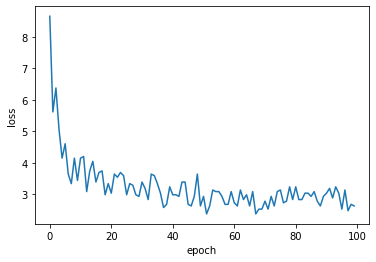

In [ ]:
# 단일층 신경망 훈련하기
layer = SingleLayer()
layer.fit(x_train, y_train)
print('정확도:',layer.score(x_test, y_test))

#손실함수의 누적값 확인하기
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 사이킷런으로 로지스틱 회귀 수행


> 사이킷런의 경사하강법 구현 클래스는 SGDClassifier



In [ ]:
# 1. 로지스틱 손실 함수 지정하기
from sklearn.linear_model import SGDClassifier
# SGDClassifier에 로지스틱 회귀를 적용하려면 loss = 'log', max_iter: 반복횟수, tol: 로지스틱 손실함수의 값이 지정값 만큼 감소되지 않으면 반복 중단
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

# 2. 훈련하고 평가하기
sgd.fit(x_train, y_train)
print('정확도:', sgd.score(x_test, y_test))

# 3. 예측하기
sgd.predict(x_test[0:10])

정확도: 0.8333333333333334


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])